In [ ]:
import pandas as pd
import os
import joblib

# -------------------------------------
# LOAD THE ORIGINAL day.csv FILE
# -------------------------------------
df = pd.read_csv(r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv")

# Save the actual values before dropping
actual_cnt = df['cnt'].copy()

# -------------------------------------
# PREPROCESS EXACTLY THE SAME AS TRAINING
# -------------------------------------

# Drop columns not used in training
df = df.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1)

# One-hot encoding (same as during training)
df = pd.get_dummies(
    df,
    columns=['season', 'mnth', 'weekday', 'weathersit'],
    drop_first=True
)

# Load training file to match columns
train_df = pd.read_csv(r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv")
required_cols = train_df.drop('cnt', axis=1).columns

# Add missing columns in test dataset
for col in required_cols:
    if col not in df.columns:
        df[col] = 0

# Ensure same column order
df = df[required_cols]

# -------------------------------------
# LOAD SCALER AND APPLY SCALING
# -------------------------------------
scaler = joblib.load(r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\scaler.pkl")
num_cols = ['temp','hum','windspeed']
df[num_cols] = scaler.transform(df[num_cols])

# -------------------------------------
# LOAD YOUR BEST MODEL
# -------------------------------------
model = joblib.load(r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\gradient_boost(CV).pkl")

# -------------------------------------
# PREDICT
# -------------------------------------
predictions = model.predict(df)

# Create final table
results = pd.DataFrame({
    "Actual_cnt": actual_cnt,
    "Predicted_cnt": predictions
})

print(results.head())

# Set your desired directory path
save_dir = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling"  

# File name
file_name = "Predicted_Results.csv"

# Full path
save_path = os.path.join(save_dir, file_name)

# Save results
results.to_csv(save_path, index=False)

print(f"Saved Successfully: {save_path}")



   Actual_cnt  Predicted_cnt
0         985    1076.457679
1         801    2138.131964
2        1349    1376.995359
3        1562    1559.169248
4        1600    1639.810161
Saved: Predicted_Results.csv


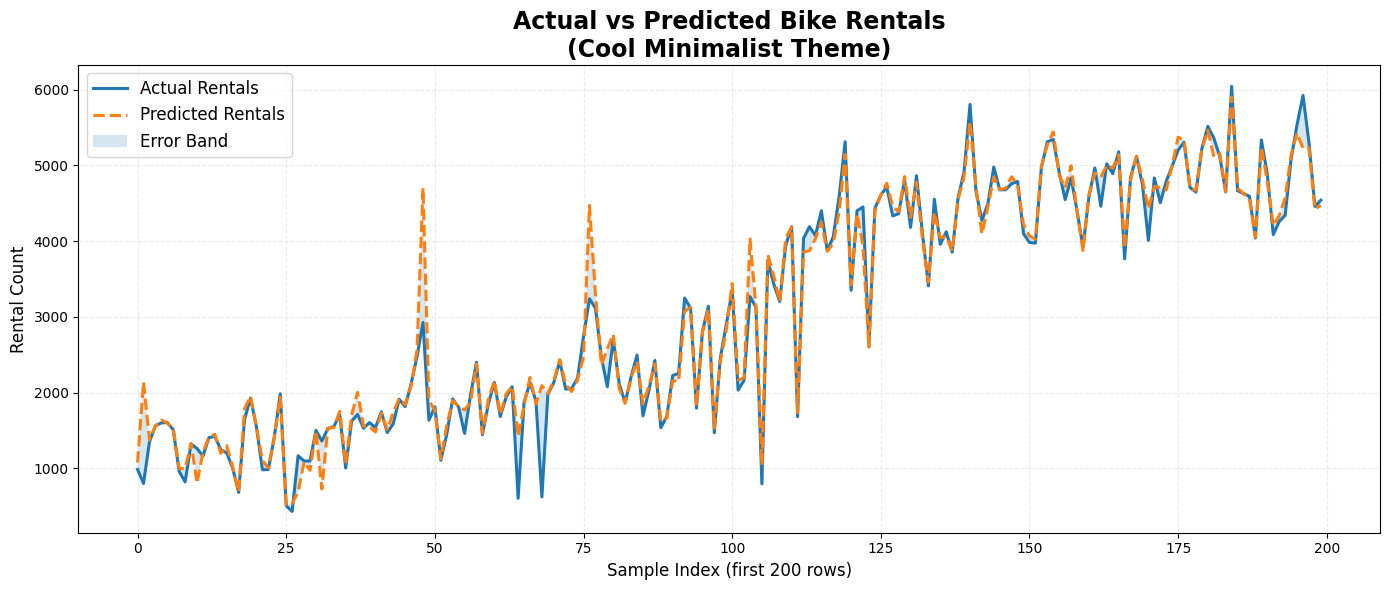

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# First 200 rows for visualization
actual = results['Actual_cnt'].head(200).values
pred = results['Predicted_cnt'].head(200).values
x = np.arange(len(actual))

plt.figure(figsize=(14,6))

# Actual Line - Cool theme
plt.plot(x, actual, label="Actual Rentals", linewidth=2.2)

# Predicted Line
plt.plot(x, pred, label="Predicted Rentals", linewidth=2.2, linestyle="--")

# Light shaded band for error
plt.fill_between(x, actual, pred, alpha=0.18, label="Error Band")

# Titles and axes labels
plt.title("Actual vs Predicted Bike Rentals\n(Cool Minimalist Theme)", fontsize=17, weight="bold")
plt.xlabel("Sample Index (first 200 rows)", fontsize=12)
plt.ylabel("Rental Count", fontsize=12)

# Legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.25, linestyle="--")

plt.tight_layout()
plt.show()
